<a href="https://colab.research.google.com/github/tanoManzo/mimic_trajectories/blob/dev/MIMIC_TRAJECTORY_embeddings_04_02_collect_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Collection, Embeddings and Attitude

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
notes_path = "/content/drive/MyDrive/NIH/Data/"

In [66]:
file_name = "ICUSTAYS.csv"
df_ward = pd.read_csv(notes_path+file_name)
subject_id_tsicu = df_ward[(df_ward['FIRST_CAREUNIT']=='TSICU') & (df_ward['LAST_CAREUNIT']=='TSICU')].SUBJECT_ID.unique()
print(f'Number of Subjects in TSICU: {len(subject_id_tsicu)}')

Number of Subjects in TSICU: 5418


In [67]:
file_name = "DIAGNOSES_ICD.csv"
df_icd = pd.read_csv(notes_path+file_name)
df_icd_first = df_icd[df_icd['SEQ_NUM']==1]
df_icd_first_tsicu = df_icd_first[df_icd_first['SUBJECT_ID'].isin(subject_id_tsicu)]
print(f'Number of unique ICD 9 first sequence from TCICU subject: {df_icd_first_tsicu.ICD9_CODE.nunique()}')
icd_tsicu = df_icd_first_tsicu.ICD9_CODE.value_counts().nlargest(5)
print('Top 5 Popular ICD9 in the TSICU population with duplicates:')
print("code  #subjects")
icd_tsicu

Number of unique ICD 9 first sequence from TCICU subject: 1387
Top 5 Popular ICD9 in the TSICU population with duplicates:
code  #subjects


431      190
0389     164
85221    103
51881     81
430       79
Name: ICD9_CODE, dtype: int64

In [68]:
condition = []
for item in df_icd['ICD9_CODE'].values:
  
  if str(item).isdigit():
    item = float(item)
    if (item>799 and item<1000):
      condition.append(True)
    else: 
      condition.append(False)
  else:
      condition.append(False)

df_8xx = df_icd[condition]
df_8xx_tsicu = df_8xx[df_8xx['SUBJECT_ID'].isin(subject_id_tsicu)]
icd8xx_subjects_ids = df_8xx_tsicu['SUBJECT_ID'].unique()
icd8xx_hosp_ids = df_8xx_tsicu['HADM_ID'].unique()
print(f'Number of subjects with a first sequence ICD 9 code [800,900) : {len(icd8xx_subjects_ids)}')
print(f'Number of hospital stays with a first sequence ICD 9 code [800,900) : {len(icd8xx_hosp_ids)}')

Number of subjects with a first sequence ICD 9 code [800,900) : 272
Number of hospital stays with a first sequence ICD 9 code [800,900) : 290


In [69]:
print(df_8xx_tsicu['ICD9_CODE'].unique())

['920' '00845' '938' '936' '0940' '932' '0971' '0993' '937' '00841']


In [70]:
icd8xx_subjects_ids

array([  778,  1158,  1258,  2830,  2934,  1602,  2144,  2589,  4579,
        4687,  5204,  4787,  5260,  2265,  2397,  1860,  4916,  7024,
        4272,  6780,  4306,  4655,  4659,  4097,  5909,  6066,  8359,
        5835,  6131,  6973,  5362,  6214,  7637,  7235,  7475,  8655,
        8094,  9437, 10381,  9897, 10434,  9984, 12281, 11776,  9763,
       13440, 11382, 12653, 15770, 13259, 13249, 13391, 13584, 12623,
       13167, 12483, 12943, 14314, 15407, 14970, 17125, 16986, 14754,
       14332, 14903, 16946, 16912, 16792, 17610, 16200, 17330, 16757,
       18982, 18460, 19059, 18036, 17959, 19133, 21068, 20832, 21273,
       17835, 20190, 19533, 24253, 24285, 21413, 21429, 23054, 22026,
       21706, 23983, 24481, 24601, 23150, 23632, 24622, 23432, 23476,
       26161, 25274, 25175, 23373, 25225, 26130, 26395, 25259, 26274,
       27910, 27933, 26868, 27392, 27790, 27947, 29291, 26942, 29374,
       26579, 29035, 26492, 28193, 28013, 28868, 28744, 28162, 28170,
       30638, 30121,

In [71]:
icd8xx_hosp_ids

array([132827, 197072, 177293, 193970, 145863, 108723, 105479, 113195,
       115691, 114175, 199198, 119994, 104141, 173839, 134020, 162070,
       115497, 130079, 150105, 196156, 156422, 145214, 120724, 158479,
       187795, 131489, 160240, 155634, 149418, 186770, 156448, 193068,
       181369, 169579, 171473, 112214, 183807, 119199, 128819, 146780,
       155329, 176366, 159537, 147207, 127830, 132902, 161707, 111295,
       101433, 141067, 105880, 153465, 159675, 164729, 172785, 151740,
       135292, 194400, 199482, 101335, 188968, 190594, 143991, 180931,
       185033, 130234, 125818, 167666, 107536, 144461, 129117, 150158,
       150395, 161643, 163603, 148671, 152853, 173108, 190161, 192479,
       104361, 160786, 164343, 142170, 187841, 138137, 142771, 167890,
       171801, 137000, 139341, 107741, 152404, 127753, 117995, 123049,
       141081, 108890, 120425, 178134, 193151, 155910, 170704, 164770,
       131885, 132921, 163407, 103361, 127353, 171702, 125681, 143303,
      

In [8]:
patients = "PATIENTS.csv"
df_patients = pd.read_csv(notes_path+patients)
df_patients_icd8xx_tsicu = df_patients[df_patients['SUBJECT_ID'].isin(icd8xx_subjects_ids)]

print('Subjects Expired (1), Alive (0): ')
print(df_patients_icd8xx_tsicu['EXPIRE_FLAG'].value_counts())
print(df_patients_icd8xx_tsicu['GENDER'].value_counts())

Subjects Expired (1), Alive (0): 
0    159
1    113
Name: EXPIRE_FLAG, dtype: int64
M    153
F    119
Name: GENDER, dtype: int64


In [9]:
gcs_total = "NOTES_NURSING_TRAJECTORIES_TSICU_GCS_TOTAL.csv"
df_gcs_total = pd.read_csv(notes_path+gcs_total)
df_gcs_total.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14138 entries, 0 to 14137
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ROW_ID        14138 non-null  int64  
 1   SUBJECT_ID    14138 non-null  int64  
 2   HADM_ID       14138 non-null  int64  
 3   ICUSTAY_ID    14138 non-null  float64
 4   ITEMID        14138 non-null  int64  
 5   CHARTTIME     14138 non-null  object 
 6   STORETIME     14138 non-null  object 
 7   CGID          14138 non-null  float64
 8   VALUE         14137 non-null  float64
 9   VALUENUM      14137 non-null  float64
 10  VALUEUOM      14138 non-null  object 
 11  WARNING       0 non-null      float64
 12  ERROR         0 non-null      float64
 13  RESULTSTATUS  0 non-null      float64
 14  STOPPED       14138 non-null  object 
dtypes: float64(7), int64(4), object(4)
memory usage: 1.6+ MB


In [10]:
df_gcs_total_subjects = df_gcs_total[df_gcs_total['SUBJECT_ID'].isin(icd8xx_subjects_ids)]
df_gcs_total_subjects['SUBJECT_ID'].nunique()

149

In [ ]:
df_gcs_total_subjects.info()
df_gcs_total_subjects.sort_values(by=['HADM_ID','CHARTTIME'])

In [12]:
df_patients_icd8xx_tsicu_gcs_scores = df_gcs_total_subjects.groupby(['SUBJECT_ID', 'HADM_ID']).agg(
    MAX_SCORE=('VALUE', 'max'),
    MIN_SCORE=('VALUE', 'min'),
    DELTA_SCORE=('VALUE', lambda x: x.max() - x.min())
).reset_index()
df_patients_icd8xx_tsicu_gcs_scores.info()
df_patients_icd8xx_tsicu_gcs_scores

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 291 entries, 0 to 290
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   SUBJECT_ID   291 non-null    int64  
 1   HADM_ID      291 non-null    int64  
 2   MAX_SCORE    291 non-null    float64
 3   MIN_SCORE    291 non-null    float64
 4   DELTA_SCORE  291 non-null    float64
dtypes: float64(3), int64(2)
memory usage: 11.5 KB


,SUBJECT_ID,HADM_ID,MAX_SCORE,MIN_SCORE,DELTA_SCORE
0,778,132827,15.0,15.0,0.0
1,1158,155719,15.0,8.0,7.0
2,1158,197072,15.0,3.0,12.0
3,1158,197763,14.0,6.0,8.0
4,1258,177293,14.0,8.0,6.0
...,...,...,...,...,...
286,32775,115046,15.0,15.0,0.0
287,32775,128184,15.0,3.0,12.0
288,32775,137148,15.0,15.0,0.0
289,32775,172084,15.0,15.0,0.0


In [13]:
PATH_TO_SAVE = "/content/drive/MyDrive/NIH/Data/"
name_file_to_save = 'NOTES_NURSING_TRAJECTORIES_TSICU_GCS_SUB_CG.csv'
#df_patients_icd8xx_tsicu_gcs_scores.to_csv(PATH_TO_SAVE+name_file_to_save,index=False)

number of notes: min=0.0, max=12.0, mean=5.213058419243986,  median=5.0


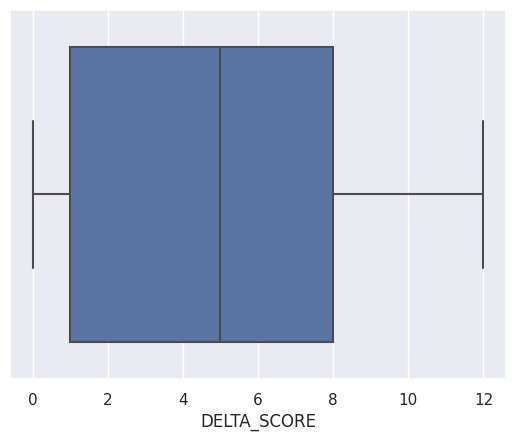

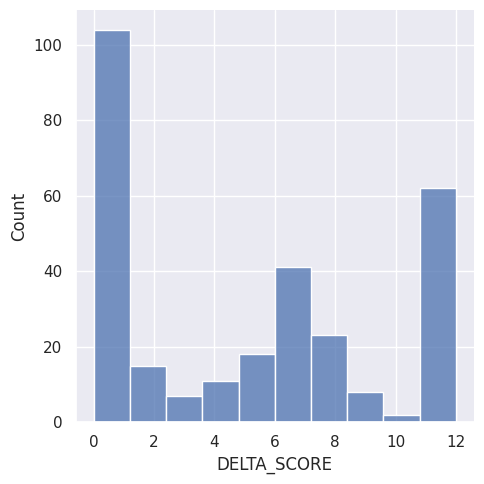

In [14]:
sns.set()

num_notes = df_patients_icd8xx_tsicu_gcs_scores['DELTA_SCORE']
#print(num_notes)
print(f'number of notes: min={num_notes.min()}, max={num_notes.max()}, mean={num_notes.mean()},  median={num_notes.median()}')
sns.boxplot(x=num_notes)
sns.displot(num_notes)

In [15]:
df_patients_icd8xx_tsicu_gcs_scores_subjects = df_patients_icd8xx_tsicu_gcs_scores.groupby(['SUBJECT_ID']).agg(
    MAX_SCORE=('MAX_SCORE', 'max'),
    MIN_SCORE=('MIN_SCORE', 'min'),
    CG_COUNT=('SUBJECT_ID', 'count')
).reset_index()
df_patients_icd8xx_tsicu_gcs_scores_subjects['DELTA_SCORE'] = df_patients_icd8xx_tsicu_gcs_scores_subjects['MAX_SCORE'] - df_patients_icd8xx_tsicu_gcs_scores_subjects['MIN_SCORE']

df_patients_icd8xx_tsicu_gcs_scores_subjects.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   SUBJECT_ID   149 non-null    int64  
 1   MAX_SCORE    149 non-null    float64
 2   MIN_SCORE    149 non-null    float64
 3   CG_COUNT     149 non-null    int64  
 4   DELTA_SCORE  149 non-null    float64
dtypes: float64(3), int64(2)
memory usage: 5.9 KB


In [16]:
PATH_TO_SAVE = "/content/drive/MyDrive/NIH/Data/"
name_file_to_save = 'NOTES_NURSING_TRAJECTORIES_TSICU_GCS_SUB_ONLY.csv'
#df_patients_icd8xx_tsicu_gcs_scores_subjects.to_csv(PATH_TO_SAVE+name_file_to_save,index=False)

In [17]:
note_events = "NOTEEVENTS.csv"
df_note_events = pd.read_csv(notes_path+note_events)
df_note_events.info()

<ipython-input-17-8fd00f55f791>:2: DtypeWarning: Columns (4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  df_note_events = pd.read_csv(notes_path+note_events)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2083180 entries, 0 to 2083179
Data columns (total 11 columns):
 #   Column       Dtype  
---  ------       -----  
 0   ROW_ID       int64  
 1   SUBJECT_ID   int64  
 2   HADM_ID      float64
 3   CHARTDATE    object 
 4   CHARTTIME    object 
 5   STORETIME    object 
 6   CATEGORY     object 
 7   DESCRIPTION  object 
 8   CGID         float64
 9   ISERROR      float64
 10  TEXT         object 
dtypes: float64(3), int64(2), object(6)
memory usage: 174.8+ MB


In [18]:
#df_note_events_specific_stay = df_note_events[df_note_events['HADM_ID'] == 104732] # for testing
#df_note_events_specific_stay # for testing

In [19]:
df_notes_icd8xx_tsicu_gcs_scores = df_patients_icd8xx_tsicu_gcs_scores.merge(df_note_events, on=['SUBJECT_ID','HADM_ID'], how='inner')
df_notes_icd8xx_tsicu_gcs_scores = df_notes_icd8xx_tsicu_gcs_scores.merge(df_patients[['SUBJECT_ID', 'EXPIRE_FLAG']], on=['SUBJECT_ID'], how='inner')
df_notes_icd8xx_tsicu_gcs_scores = df_notes_icd8xx_tsicu_gcs_scores.merge(df_8xx_tsicu[['SUBJECT_ID', 'ICD9_CODE','HADM_ID']], on=['SUBJECT_ID','HADM_ID'], how='inner')
df_notes_icd8xx_tsicu_gcs_scores = df_notes_icd8xx_tsicu_gcs_scores[df_notes_icd8xx_tsicu_gcs_scores['CATEGORY']=='Nursing/other']
#df_notes_icd8xx_tsicu_gcs_scores = df_notes_icd8xx_tsicu_gcs_scores[df_notes_icd8xx_tsicu_gcs_scores['DELTA_SCORE'] > 5.0]
#df_notes_icd8xx_tsicu_gcs_scores = df_notes_icd8xx_tsicu_gcs_scores[df_notes_icd8xx_tsicu_gcs_scores['EXPIRE_FLAG'] == 1] # for testing
#df_notes_icd8xx_tsicu_gcs_scores = df_notes_icd8xx_tsicu_gcs_scores[df_notes_icd8xx_tsicu_gcs_scores['HADM_ID'] == 108474] # for testing
df_notes_icd8xx_tsicu_gcs_scores = df_notes_icd8xx_tsicu_gcs_scores.sort_values(by=['HADM_ID','CHARTTIME'])
#df_notes_icd8xx_tsicu_gcs_scores = df_notes_icd8xx_tsicu_gcs_scores[df_notes_icd8xx_tsicu_gcs_scores['TEXT'].str.lower().str.contains('social')]

df_notes_icd8xx_tsicu_gcs_scores.info()
df_notes_icd8xx_tsicu_gcs_scores

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3198 entries, 1797 to 1693
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   SUBJECT_ID   3198 non-null   int64  
 1   HADM_ID      3198 non-null   int64  
 2   MAX_SCORE    3198 non-null   float64
 3   MIN_SCORE    3198 non-null   float64
 4   DELTA_SCORE  3198 non-null   float64
 5   ROW_ID       3198 non-null   int64  
 6   CHARTDATE    3198 non-null   object 
 7   CHARTTIME    3198 non-null   object 
 8   STORETIME    3198 non-null   object 
 9   CATEGORY     3198 non-null   object 
 10  DESCRIPTION  3198 non-null   object 
 11  CGID         3198 non-null   float64
 12  ISERROR      0 non-null      float64
 13  TEXT         3198 non-null   object 
 14  EXPIRE_FLAG  3198 non-null   int64  
 15  ICD9_CODE    3198 non-null   object 
dtypes: float64(5), int64(4), object(7)
memory usage: 424.7+ KB


,SUBJECT_ID,HADM_ID,MAX_SCORE,MIN_SCORE,DELTA_SCORE,ROW_ID,CHARTDATE,CHARTTIME,STORETIME,CATEGORY,DESCRIPTION,CGID,ISERROR,TEXT,EXPIRE_FLAG,ICD9_CODE
1797,12943,101335,15.0,8.0,7.0,1432021,2123-05-31,2123-05-31 04:47:00,2123-05-31 05:04:00,Nursing/other,Report,14151.0,NaN,ADM. NOTE\n\nASSESSMENT AS NOTED\n\nHIT BY CAR...,0,920
1798,12943,101335,15.0,8.0,7.0,1432022,2123-05-31,2123-05-31 05:35:00,2123-05-31 05:40:00,Nursing/other,Report,15411.0,NaN,Resp Care\n26 yom s/p MVA on bicycle struck by...,0,920
1799,12943,101335,15.0,8.0,7.0,1432023,2123-05-31,2123-05-31 15:37:00,2123-05-31 15:49:00,Nursing/other,Report,20297.0,NaN,nsg NOTE\nROS:\n\n CV:POSITIONAL ART LINE ...,0,920
1800,12943,101335,15.0,8.0,7.0,1432024,2123-05-31,2123-05-31 15:40:00,2123-05-31 15:43:00,Nursing/other,Report,17665.0,NaN,SOCIAL WORK\nPt referred to SW secondary to be...,0,920
1801,12943,101335,15.0,8.0,7.0,1432025,2123-05-31,2123-05-31 21:15:00,2123-05-31 21:27:00,Nursing/other,Report,18488.0,NaN,TRAUMA SICU NPN\nO:\nNEURO: PT IS LETHARGIC WI...,0,920
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1702,12483,199482,15.0,14.0,1.0,1425508,2132-02-28,2132-02-28 04:29:00,2132-02-28 04:46:00,Nursing/other,Report,15067.0,NaN,7p to 7a Micu Progress Note\n\nNeuro - Pt orie...,0,00845
1694,12483,199482,15.0,14.0,1.0,1425509,2132-02-28,2132-02-28 14:50:00,2132-02-28 15:17:00,Nursing/other,Report,19014.0,NaN,MICU NURSING PROGRESS NOTE. 0700-1900\n S...,0,00845
1695,12483,199482,15.0,14.0,1.0,1425510,2132-02-28,2132-02-28 18:19:00,2132-02-28 18:23:00,Nursing/other,Report,19014.0,NaN,Addendum to micu nursing progress note 0700-19...,0,00845
1696,12483,199482,15.0,14.0,1.0,1425511,2132-02-29,2132-02-29 05:02:00,2132-02-29 05:16:00,Nursing/other,Report,15067.0,NaN,7p to 7a Micu Progress Note\n\nNeuro - Pt more...,0,00845


In [20]:
PATH_TO_SAVE = "/content/drive/MyDrive/NIH/Data/"
name_file_to_save = 'NOTES_NURSING_TRAJECTORIES_TSICU_TEXT_ONLY.csv'
#df_notes_icd8xx_tsicu_gcs_scores['TEXT'].to_csv(PATH_TO_SAVE+name_file_to_save,index=False)

In [21]:
PATH_TO_SAVE = "/content/drive/MyDrive/NIH/Data/"
name_file_to_save = 'NOTES_NURSING_TRAJECTORIES_TSICU_GCS_HADM.csv'
#df_notes_icd8xx_tsicu_gcs_scores.to_csv(PATH_TO_SAVE+name_file_to_save,index=False)

In [22]:
df_note_icd8xx_tsicu = df_note_events[df_note_events['SUBJECT_ID'].isin(icd8xx_subjects_ids)]
print(f'Number of total notes: {len(df_note_icd8xx_tsicu)}')
df_nursing_progress_note_icd8xx_tsicu = df_note_icd8xx_tsicu[df_note_icd8xx_tsicu['DESCRIPTION']=='Nursing Progress Note']
print(f'Number of Nursing Progress Notes: {len(df_nursing_progress_note_icd8xx_tsicu)}')
df_discharge_note_icd8xx_tsicu = df_note_icd8xx_tsicu[df_note_icd8xx_tsicu['CATEGORY']=='Discharge summary']
print(f'Number of Discharge summary: {len(df_discharge_note_icd8xx_tsicu)}')

Number of total notes: 26908
Number of Nursing Progress Notes: 3765
Number of Discharge summary: 678


In [23]:
cgid_icd8xx_tsicu = df_nursing_progress_note_icd8xx_tsicu['CGID'].unique()
#print(f'Number of caregivers: {len(cgid_maxicu_tsicu)}')

In [24]:
caregivers = "CAREGIVERS.csv"
df_caregivers = pd.read_csv(notes_path+caregivers)
df_caregivers[df_caregivers['CGID'].isin(cgid_icd8xx_tsicu)].LABEL.value_counts()

RN      232
RNs       4
Rn        4
rn        2
PCT       1
Nurs      1
NS        1
CoRN      1
MD        1
RT        1
MDs       1
RRT       1
MS        1
Name: LABEL, dtype: int64

In [25]:
name_file= "ADMISSIONS.csv"
df_adm = pd.read_csv(notes_path+name_file)
df_adm_icd8xx_tsicu = df_adm[df_adm['SUBJECT_ID'].isin(cgid_icd8xx_tsicu)]
df_adm_icd8xx_tsicu

,ROW_ID,SUBJECT_ID,HADM_ID,ADMITTIME,DISCHTIME,DEATHTIME,ADMISSION_TYPE,ADMISSION_LOCATION,DISCHARGE_LOCATION,INSURANCE,LANGUAGE,RELIGION,MARITAL_STATUS,ETHNICITY,EDREGTIME,EDOUTTIME,DIAGNOSIS,HOSPITAL_EXPIRE_FLAG,HAS_CHARTEVENTS_DATA
14853,17902,14626,148547,2190-07-16 07:15:00,2190-07-22 17:00:00,NaN,ELECTIVE,PHYS REFERRAL/NORMAL DELI,HOME HEALTH CARE,Medicare,NaN,OTHER,MARRIED,PATIENT DECLINED TO ANSWER,NaN,NaN,CORONARY ARTERY DISEASE\CORONARY ARTERY BYPASS...,0,1
15023,17936,14657,111125,2200-07-05 19:37:00,2200-07-11 10:45:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,HOME,Self Pay,NaN,OTHER,DIVORCED,UNKNOWN/NOT SPECIFIED,2200-07-05 15:43:00,2200-07-05 21:00:00,LUMBAR FRACTURE,0,1
15144,17772,14518,187448,2195-08-26 14:05:00,2195-08-30 14:30:00,NaN,NEWBORN,PHYS REFERRAL/NORMAL DELI,HOME,Private,NaN,UNOBTAINABLE,NaN,ASIAN,NaN,NaN,NEWBORN,0,1
15171,17799,14542,132211,2132-07-25 00:54:00,2132-07-29 20:59:00,2132-07-29 20:59:00,EMERGENCY,TRANSFER FROM SKILLED NUR,DEAD/EXPIRED,Medicare,RUSS,JEWISH,WIDOWED,WHITE,2132-07-24 20:38:00,2132-07-25 03:13:00,RAPID AFIB-URINARY TRACT INFECTION,1,1
15396,17329,14151,128499,2135-12-29 11:11:00,2136-04-21 20:07:00,NaN,NEWBORN,CLINIC REFERRAL/PREMATURE,HOME HEALTH CARE,Private,NaN,NaN,NaN,BLACK/AFRICAN AMERICAN,NaN,NaN,NEWBORN,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31181,25878,21202,100711,2147-01-27 17:16:00,2147-02-12 18:12:00,NaN,EMERGENCY,CLINIC REFERRAL/PREMATURE,HOME HEALTH CARE,Medicare,ENGL,CATHOLIC,MARRIED,WHITE,NaN,NaN,R/O FLU; AML,0,1
31182,25879,21202,194067,2148-02-13 16:07:00,2148-04-09 16:24:00,NaN,EMERGENCY,CLINIC REFERRAL/PREMATURE,LONG TERM CARE HOSPITAL,Medicare,ENGL,CATHOLIC,MARRIED,WHITE,NaN,NaN,(AML) ACUTE MYELOGENOUS LEUKEMIA,0,1
31183,25880,21202,104041,2148-09-30 13:05:00,2148-10-13 09:05:00,2148-10-13 09:05:00,EMERGENCY,CLINIC REFERRAL/PREMATURE,DEAD/EXPIRED,Medicare,ENGL,CATHOLIC,MARRIED,WHITE,2148-09-30 11:04:00,2148-09-30 14:33:00,ALTERED MENTAL STATUS,1,1
31185,25882,21204,162306,2148-05-09 21:39:00,2148-05-10 23:04:00,NaN,NEWBORN,CLINIC REFERRAL/PREMATURE,SHORT TERM HOSPITAL,Private,NaN,NOT SPECIFIED,NaN,WHITE,NaN,NaN,NEWBORN,0,1


Report

In [26]:
print(f'Number of Subjects in TSICU: {len(subject_id_tsicu)}')
print(f'Number of subjects with a first sequence ICD 9 code [800,900) : {len(icd8xx_subjects_ids)}')
print('')
print('Subjects Expired (1), Alive (0): ')
print(df_patients_icd8xx_tsicu['EXPIRE_FLAG'].value_counts())
print('')
print('Gender:')
print(df_patients_icd8xx_tsicu['GENDER'].value_counts())
print('')
print(f'Number of total notes: {len(df_note_icd8xx_tsicu)}')
print(f'Number of Nursing Progress Notes: {len(df_nursing_progress_note_icd8xx_tsicu)}')
print(f'Number of Discharge summary: {len(df_discharge_note_icd8xx_tsicu)}')
print(f'Number of caregivers: {len(cgid_icd8xx_tsicu)}')

Number of Subjects in TSICU: 5418
Number of subjects with a first sequence ICD 9 code [800,900) : 272

Subjects Expired (1), Alive (0): 
0    159
1    113
Name: EXPIRE_FLAG, dtype: int64

Gender:
M    153
F    119
Name: GENDER, dtype: int64

Number of total notes: 26908
Number of Nursing Progress Notes: 3765
Number of Discharge summary: 678
Number of caregivers: 251


# END


In [27]:
print(df_note_events['CATEGORY'].unique())

['Discharge summary' 'Echo' 'ECG' 'Nursing' 'Physician ' 'Rehab Services'
 'Case Management ' 'Respiratory ' 'Nutrition' 'General' 'Social Work'
 'Pharmacy' 'Consult' 'Radiology' 'Nursing/other']


## **Data Preprocessing**

In [28]:
df_note_events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2083180 entries, 0 to 2083179
Data columns (total 11 columns):
 #   Column       Dtype  
---  ------       -----  
 0   ROW_ID       int64  
 1   SUBJECT_ID   int64  
 2   HADM_ID      float64
 3   CHARTDATE    object 
 4   CHARTTIME    object 
 5   STORETIME    object 
 6   CATEGORY     object 
 7   DESCRIPTION  object 
 8   CGID         float64
 9   ISERROR      float64
 10  TEXT         object 
dtypes: float64(3), int64(2), object(6)
memory usage: 174.8+ MB


Grab tsicu notes, merge with ward and patients tables

In [29]:
# get new type of notes (TSICU)
df_notes_TSICU = pd.DataFrame()
#df_notes_TSICU = df_notes.merge(df_note_events[['ROW_ID', 'CATEGORY']], on='ROW_ID')
df_notes_TSICU = df_note_events.merge(df_caregivers.drop('ROW_ID', axis=1), on='CGID')
#df_notes_TSICU = df_notes_TSICU.merge(df_ward.drop('ROW_ID', axis=1), on='SUBJECT_ID')
df_notes_TSICU = df_notes_TSICU.merge(df_patients.drop('ROW_ID', axis=1), on='SUBJECT_ID')
#df_notes_TSICU = df_notes_TSICU[(df_notes_TSICU['first_careunit'] == 'TSICU') & (df_notes_TSICU['last_careunit'] == 'TSICU')].drop_duplicates()
df_notes_TSICU.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1246404 entries, 0 to 1246403
Data columns (total 19 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   ROW_ID         1246404 non-null  int64  
 1   SUBJECT_ID     1246404 non-null  int64  
 2   HADM_ID        1240545 non-null  float64
 3   CHARTDATE      1246404 non-null  object 
 4   CHARTTIME      1244335 non-null  object 
 5   STORETIME      1246404 non-null  object 
 6   CATEGORY       1246404 non-null  object 
 7   DESCRIPTION_x  1246404 non-null  object 
 8   CGID           1246404 non-null  float64
 9   ISERROR        886 non-null      float64
 10  TEXT           1246404 non-null  object 
 11  LABEL          1212686 non-null  object 
 12  DESCRIPTION_y  853491 non-null   object 
 13  GENDER         1246404 non-null  object 
 14  DOB            1246404 non-null  object 
 15  DOD            485473 non-null   object 
 16  DOD_HOSP       336532 non-null   object 
 17  DOD_SSN 

In [30]:
df_notes_TSICU.head(5)

,ROW_ID,SUBJECT_ID,HADM_ID,CHARTDATE,CHARTTIME,STORETIME,CATEGORY,DESCRIPTION_x,CGID,ISERROR,TEXT,LABEL,DESCRIPTION_y,GENDER,DOB,DOD,DOD_HOSP,DOD_SSN,EXPIRE_FLAG
0,316234,29075,179159.0,2116-02-07,2116-02-07 14:08:00,2116-02-07 14:08:20,Nursing,Nursing Transfer Note,20808.0,NaN,"67M w/ h/o multiplemyeloma Dx [**2111**], neur...",RN,RN,M,2048-04-19 00:00:00,2116-03-30 00:00:00,2116-03-30 00:00:00,2116-03-30 00:00:00,1
1,316140,29075,179159.0,2116-02-06,2116-02-06 05:06:00,2116-02-06 08:36:56,Nursing,Nursing Transfer Note,20808.0,1.0,.H/O back pain\n Assessment:\n Action:\n ...,RN,RN,M,2048-04-19 00:00:00,2116-03-30 00:00:00,2116-03-30 00:00:00,2116-03-30 00:00:00,1
2,316249,29075,179159.0,2116-02-07,2116-02-07 17:21:00,2116-02-07 17:21:31,Nursing,Nursing Progress Note,20808.0,NaN,"Gastrointestinal bleed, lower (Hematochezia, B...",RN,RN,M,2048-04-19 00:00:00,2116-03-30 00:00:00,2116-03-30 00:00:00,2116-03-30 00:00:00,1
3,316183,29075,179159.0,2116-02-06,2116-02-06 16:52:00,2116-02-06 16:52:53,Nursing,Nursing Progress Note,20808.0,NaN,.H/O back pain\n Assessment:\n c/o back pa...,RN,RN,M,2048-04-19 00:00:00,2116-03-30 00:00:00,2116-03-30 00:00:00,2116-03-30 00:00:00,1
4,316238,29075,179159.0,2116-02-07,2116-02-07 15:37:00,2116-02-07 15:37:10,Physician,Physician Resident Progress Note,21203.0,NaN,Chief Complaint:\n 24 Hour Events:\n EGD d...,MD,Resident/Fellow/PA/NP,M,2048-04-19 00:00:00,2116-03-30 00:00:00,2116-03-30 00:00:00,2116-03-30 00:00:00,1


Join with ICD

In [31]:
icd = "DIAGNOSES_ICD.csv"
df_icd = pd.read_csv(notes_path+icd)
df_icd.columns = df_icd.columns.str.upper()
df_icd = df_icd.dropna(subset=['SEQ_NUM'])
df_icd['SEQ_NUM'] = df_icd['SEQ_NUM'].astype(int)
unique_values = df_icd['SEQ_NUM'].unique()
print("unique_values: ")
print(unique_values)
idx = df_icd.groupby(['HADM_ID', 'SUBJECT_ID'])['SEQ_NUM'].idxmin()
df_icd = df_icd.loc[idx]
df_icd.info()

unique_values: 
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39]
<class 'pandas.core.frame.DataFrame'>
Int64Index: 58929 entries, 462245 to 374673
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ROW_ID      58929 non-null  int64 
 1   SUBJECT_ID  58929 non-null  int64 
 2   HADM_ID     58929 non-null  int64 
 3   SEQ_NUM     58929 non-null  int64 
 4   ICD9_CODE   58929 non-null  object
dtypes: int64(4), object(1)
memory usage: 2.7+ MB


In [32]:
df_notes_TSICU = df_notes_TSICU.merge(df_icd[['HADM_ID','ICD9_CODE','SEQ_NUM', 'SUBJECT_ID']], on=['HADM_ID', 'SUBJECT_ID'])
df_notes_TSICU.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1240477 entries, 0 to 1240476
Data columns (total 21 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   ROW_ID         1240477 non-null  int64  
 1   SUBJECT_ID     1240477 non-null  int64  
 2   HADM_ID        1240477 non-null  float64
 3   CHARTDATE      1240477 non-null  object 
 4   CHARTTIME      1240477 non-null  object 
 5   STORETIME      1240477 non-null  object 
 6   CATEGORY       1240477 non-null  object 
 7   DESCRIPTION_x  1240477 non-null  object 
 8   CGID           1240477 non-null  float64
 9   ISERROR        879 non-null      float64
 10  TEXT           1240477 non-null  object 
 11  LABEL          1206875 non-null  object 
 12  DESCRIPTION_y  847984 non-null   object 
 13  GENDER         1240477 non-null  object 
 14  DOB            1240477 non-null  object 
 15  DOD            482275 non-null   object 
 16  DOD_HOSP       333983 non-null   object 
 17  DOD_SSN 

In [33]:
df_notes_TSICU.head(20)

,ROW_ID,SUBJECT_ID,HADM_ID,CHARTDATE,CHARTTIME,STORETIME,CATEGORY,DESCRIPTION_x,CGID,ISERROR,...,LABEL,DESCRIPTION_y,GENDER,DOB,DOD,DOD_HOSP,DOD_SSN,EXPIRE_FLAG,ICD9_CODE,SEQ_NUM
0,316234,29075,179159.0,2116-02-07,2116-02-07 14:08:00,2116-02-07 14:08:20,Nursing,Nursing Transfer Note,20808.0,NaN,...,RN,RN,M,2048-04-19 00:00:00,2116-03-30 00:00:00,2116-03-30 00:00:00,2116-03-30 00:00:00,1,5789,1
1,316140,29075,179159.0,2116-02-06,2116-02-06 05:06:00,2116-02-06 08:36:56,Nursing,Nursing Transfer Note,20808.0,1.0,...,RN,RN,M,2048-04-19 00:00:00,2116-03-30 00:00:00,2116-03-30 00:00:00,2116-03-30 00:00:00,1,5789,1
2,316249,29075,179159.0,2116-02-07,2116-02-07 17:21:00,2116-02-07 17:21:31,Nursing,Nursing Progress Note,20808.0,NaN,...,RN,RN,M,2048-04-19 00:00:00,2116-03-30 00:00:00,2116-03-30 00:00:00,2116-03-30 00:00:00,1,5789,1
3,316183,29075,179159.0,2116-02-06,2116-02-06 16:52:00,2116-02-06 16:52:53,Nursing,Nursing Progress Note,20808.0,NaN,...,RN,RN,M,2048-04-19 00:00:00,2116-03-30 00:00:00,2116-03-30 00:00:00,2116-03-30 00:00:00,1,5789,1
4,316238,29075,179159.0,2116-02-07,2116-02-07 15:37:00,2116-02-07 15:37:10,Physician,Physician Resident Progress Note,21203.0,NaN,...,MD,Resident/Fellow/PA/NP,M,2048-04-19 00:00:00,2116-03-30 00:00:00,2116-03-30 00:00:00,2116-03-30 00:00:00,1,5789,1
5,316241,29075,179159.0,2116-02-07,2116-02-07 15:37:00,2116-02-07 16:05:26,Physician,Physician Resident Progress Note,21203.0,NaN,...,MD,Resident/Fellow/PA/NP,M,2048-04-19 00:00:00,2116-03-30 00:00:00,2116-03-30 00:00:00,2116-03-30 00:00:00,1,5789,1
6,316242,29075,179159.0,2116-02-07,2116-02-07 15:37:00,2116-02-07 16:08:06,Physician,Physician Resident Progress Note,21203.0,NaN,...,MD,Resident/Fellow/PA/NP,M,2048-04-19 00:00:00,2116-03-30 00:00:00,2116-03-30 00:00:00,2116-03-30 00:00:00,1,5789,1
7,316124,29075,179159.0,2116-02-06,2116-02-06 05:03:00,2116-02-06 06:58:35,Nursing,Nursing Progress Note,14419.0,NaN,...,RN,RN,M,2048-04-19 00:00:00,2116-03-30 00:00:00,2116-03-30 00:00:00,2116-03-30 00:00:00,1,5789,1
8,316113,29075,179159.0,2116-02-06,2116-02-06 05:03:00,2116-02-06 05:03:29,Nursing,Nursing Progress Note,14419.0,NaN,...,RN,RN,M,2048-04-19 00:00:00,2116-03-30 00:00:00,2116-03-30 00:00:00,2116-03-30 00:00:00,1,5789,1
9,316114,29075,179159.0,2116-02-06,2116-02-06 05:03:00,2116-02-06 05:05:39,Nursing,Nursing Progress Note,14419.0,NaN,...,RN,RN,M,2048-04-19 00:00:00,2116-03-30 00:00:00,2116-03-30 00:00:00,2116-03-30 00:00:00,1,5789,1


In [34]:
grouping = df_notes_TSICU.groupby(['CGID','SUBJECT_ID']).size()
df_notes_TSICU['num_of_notes'] = df_notes_TSICU.set_index(['CGID','SUBJECT_ID']).index.map(grouping)
df_notes_TSICU_filtered = df_notes_TSICU[df_notes_TSICU['num_of_notes'] > 1]
df_notes_TSICU_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 999592 entries, 0 to 1240437
Data columns (total 22 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   ROW_ID         999592 non-null  int64  
 1   SUBJECT_ID     999592 non-null  int64  
 2   HADM_ID        999592 non-null  float64
 3   CHARTDATE      999592 non-null  object 
 4   CHARTTIME      999592 non-null  object 
 5   STORETIME      999592 non-null  object 
 6   CATEGORY       999592 non-null  object 
 7   DESCRIPTION_x  999592 non-null  object 
 8   CGID           999592 non-null  float64
 9   ISERROR        860 non-null     float64
 10  TEXT           999592 non-null  object 
 11  LABEL          967855 non-null  object 
 12  DESCRIPTION_y  690997 non-null  object 
 13  GENDER         999592 non-null  object 
 14  DOB            999592 non-null  object 
 15  DOD            392445 non-null  object 
 16  DOD_HOSP       276056 non-null  object 
 17  DOD_SSN        328635 non-nu

In [35]:
df_notes_TSICU_filtered.head(10)

,ROW_ID,SUBJECT_ID,HADM_ID,CHARTDATE,CHARTTIME,STORETIME,CATEGORY,DESCRIPTION_x,CGID,ISERROR,...,DESCRIPTION_y,GENDER,DOB,DOD,DOD_HOSP,DOD_SSN,EXPIRE_FLAG,ICD9_CODE,SEQ_NUM,num_of_notes
0,316234,29075,179159.0,2116-02-07,2116-02-07 14:08:00,2116-02-07 14:08:20,Nursing,Nursing Transfer Note,20808.0,NaN,...,RN,M,2048-04-19 00:00:00,2116-03-30 00:00:00,2116-03-30 00:00:00,2116-03-30 00:00:00,1,5789,1,4
1,316140,29075,179159.0,2116-02-06,2116-02-06 05:06:00,2116-02-06 08:36:56,Nursing,Nursing Transfer Note,20808.0,1.0,...,RN,M,2048-04-19 00:00:00,2116-03-30 00:00:00,2116-03-30 00:00:00,2116-03-30 00:00:00,1,5789,1,4
2,316249,29075,179159.0,2116-02-07,2116-02-07 17:21:00,2116-02-07 17:21:31,Nursing,Nursing Progress Note,20808.0,NaN,...,RN,M,2048-04-19 00:00:00,2116-03-30 00:00:00,2116-03-30 00:00:00,2116-03-30 00:00:00,1,5789,1,4
3,316183,29075,179159.0,2116-02-06,2116-02-06 16:52:00,2116-02-06 16:52:53,Nursing,Nursing Progress Note,20808.0,NaN,...,RN,M,2048-04-19 00:00:00,2116-03-30 00:00:00,2116-03-30 00:00:00,2116-03-30 00:00:00,1,5789,1,4
4,316238,29075,179159.0,2116-02-07,2116-02-07 15:37:00,2116-02-07 15:37:10,Physician,Physician Resident Progress Note,21203.0,NaN,...,Resident/Fellow/PA/NP,M,2048-04-19 00:00:00,2116-03-30 00:00:00,2116-03-30 00:00:00,2116-03-30 00:00:00,1,5789,1,3
5,316241,29075,179159.0,2116-02-07,2116-02-07 15:37:00,2116-02-07 16:05:26,Physician,Physician Resident Progress Note,21203.0,NaN,...,Resident/Fellow/PA/NP,M,2048-04-19 00:00:00,2116-03-30 00:00:00,2116-03-30 00:00:00,2116-03-30 00:00:00,1,5789,1,3
6,316242,29075,179159.0,2116-02-07,2116-02-07 15:37:00,2116-02-07 16:08:06,Physician,Physician Resident Progress Note,21203.0,NaN,...,Resident/Fellow/PA/NP,M,2048-04-19 00:00:00,2116-03-30 00:00:00,2116-03-30 00:00:00,2116-03-30 00:00:00,1,5789,1,3
7,316124,29075,179159.0,2116-02-06,2116-02-06 05:03:00,2116-02-06 06:58:35,Nursing,Nursing Progress Note,14419.0,NaN,...,RN,M,2048-04-19 00:00:00,2116-03-30 00:00:00,2116-03-30 00:00:00,2116-03-30 00:00:00,1,5789,1,4
8,316113,29075,179159.0,2116-02-06,2116-02-06 05:03:00,2116-02-06 05:03:29,Nursing,Nursing Progress Note,14419.0,NaN,...,RN,M,2048-04-19 00:00:00,2116-03-30 00:00:00,2116-03-30 00:00:00,2116-03-30 00:00:00,1,5789,1,4
9,316114,29075,179159.0,2116-02-06,2116-02-06 05:03:00,2116-02-06 05:05:39,Nursing,Nursing Progress Note,14419.0,NaN,...,RN,M,2048-04-19 00:00:00,2116-03-30 00:00:00,2116-03-30 00:00:00,2116-03-30 00:00:00,1,5789,1,4


Filter by number of notes

number of notes: min=1, max=122367, mean=454.7734303912648,  median=48.0


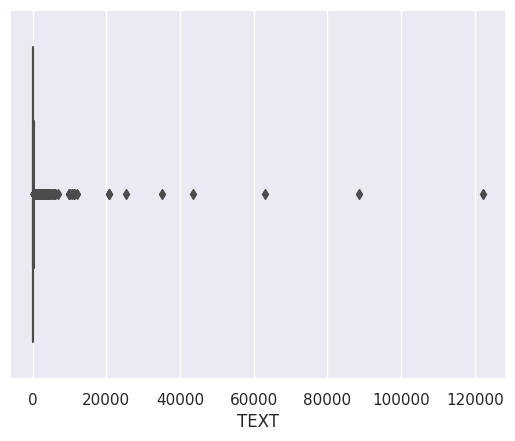

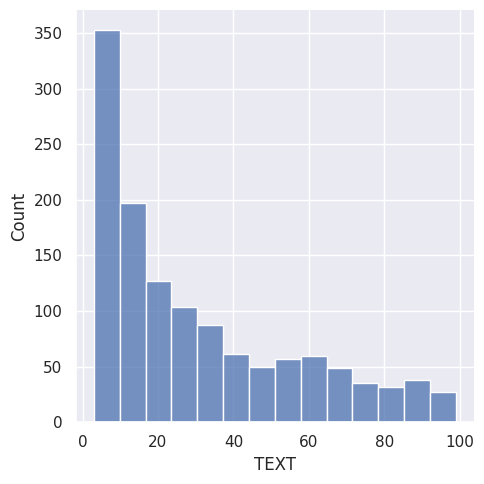

In [36]:
gb_notes = df_notes_TSICU_filtered.groupby(['ICD9_CODE'])
num_notes = gb_notes['TEXT'].count()

print(f'number of notes: min={num_notes.min()}, max={num_notes.max()}, mean={num_notes.mean()},  median={num_notes.median()}')
sns.boxplot(x=num_notes)
sns.displot(num_notes[((num_notes>2) & (num_notes<100))])

In [37]:
df_notes_TSICU_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 999592 entries, 0 to 1240437
Data columns (total 22 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   ROW_ID         999592 non-null  int64  
 1   SUBJECT_ID     999592 non-null  int64  
 2   HADM_ID        999592 non-null  float64
 3   CHARTDATE      999592 non-null  object 
 4   CHARTTIME      999592 non-null  object 
 5   STORETIME      999592 non-null  object 
 6   CATEGORY       999592 non-null  object 
 7   DESCRIPTION_x  999592 non-null  object 
 8   CGID           999592 non-null  float64
 9   ISERROR        860 non-null     float64
 10  TEXT           999592 non-null  object 
 11  LABEL          967855 non-null  object 
 12  DESCRIPTION_y  690997 non-null  object 
 13  GENDER         999592 non-null  object 
 14  DOB            999592 non-null  object 
 15  DOD            392445 non-null  object 
 16  DOD_HOSP       276056 non-null  object 
 17  DOD_SSN        328635 non-nu

In [38]:
icd9_grouping = df_notes_TSICU_filtered.groupby(['ICD9_CODE']).size()
df_notes_TSICU_filtered['num_of_conditions'] = df_notes_TSICU_filtered.set_index(['ICD9_CODE']).index.map(icd9_grouping)
#df_notes_TSICU_filtered = df_notes_TSICU_filtered[(df_notes_TSICU_filtered['num_of_conditions'] >= 15) & (df_notes_TSICU_filtered['num_of_conditions'] <= 1000)]
#df_notes_TSICU_filtered = df_notes_TSICU_filtered[(df_notes_TSICU_filtered['num_of_conditions'] >= 15) & (df_notes_TSICU_filtered['num_of_conditions'] <= 100)]
df_notes_TSICU_filtered.info()
print(icd9_grouping)

<ipython-input-38-2f58a0fcdd04>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_notes_TSICU_filtered['num_of_conditions'] = df_notes_TSICU_filtered.set_index(['ICD9_CODE']).index.map(icd9_grouping)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 999592 entries, 0 to 1240437
Data columns (total 23 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   ROW_ID             999592 non-null  int64  
 1   SUBJECT_ID         999592 non-null  int64  
 2   HADM_ID            999592 non-null  float64
 3   CHARTDATE          999592 non-null  object 
 4   CHARTTIME          999592 non-null  object 
 5   STORETIME          999592 non-null  object 
 6   CATEGORY           999592 non-null  object 
 7   DESCRIPTION_x      999592 non-null  object 
 8   CGID               999592 non-null  float64
 9   ISERROR            860 non-null     float64
 10  TEXT               999592 non-null  object 
 11  LABEL              967855 non-null  object 
 12  DESCRIPTION_y      690997 non-null  object 
 13  GENDER             999592 non-null  object 
 14  DOB                999592 non-null  object 
 15  DOD                392445 non-null  object 
 16  D

In [39]:
df_notes_TSICU_dropped_cols = df_notes_TSICU_filtered.drop(['STORETIME','CHARTDATE','CHARTTIME','DOB','DOD','DOD_HOSP','DOD_SSN'], axis=1)
df_notes_TSICU_dropped_cols.columns

Index(['ROW_ID', 'SUBJECT_ID', 'HADM_ID', 'CATEGORY', 'DESCRIPTION_x', 'CGID',
       'ISERROR', 'TEXT', 'LABEL', 'DESCRIPTION_y', 'GENDER', 'EXPIRE_FLAG',
       'ICD9_CODE', 'SEQ_NUM', 'num_of_notes', 'num_of_conditions'],
      dtype='object')

select emotional words then filter rows that dont have a minimum number of them

In [40]:
def filter_for_emotional_words(df):
  selected_words = ['pain', 'family', 'stable', 'care', 'well', 'social', 'support', 'able', 'decreased', 'warm', 'unable', 'strong', 'intact', 'good', 'times', 'aware', 'eyes', 'tolerated', 'denies', 'tolerating', 'please', 'palpable']
  print("selected_words list length: ", len(selected_words))
  pattern = '|'.join(selected_words)
  new_df = df[df['TEXT'].str.contains(pattern, regex=True)].copy()
  #filtered_data = df_notes_TSICU[df_notes_TSICU['TEXT'].str.contains(pattern, regex=True)].copy()
  new_df['num_search_words'] = new_df['TEXT'].str.count(pattern)
  #new_df = new_df[new_df['num_search_words'] >= 0]
  new_df.info()
  return new_df

In [41]:
#filtered_data = filter_for_emotional_words(df_notes_TSICU_dropped_cols)
filtered_data = df_notes_TSICU_dropped_cols

Random selection from sample set

In [42]:
#random_filtered_data = filtered_data.sample(n=50000, random_state=42)
random_filtered_data = filtered_data

Remove similar sentences

In [43]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

def remove_similar_notes(df):
  sentences = df['TEXT'].tolist()
  vectorizer = TfidfVectorizer()
  tfidf_matrix = vectorizer.fit_transform(sentences)
  similarity_threshold = 0.8

  similar_indices = []
  for i, sentence in enumerate(sentences):  # needs to be max 1000 entries
    if any(cosine_similarity(tfidf_matrix[i], tfidf_matrix[j])[0][0] > similarity_threshold for j in range(i)):  # very slow ~10 minutes for 1000 entries, exponential complexity (more than 5 hours if 6000 entries)
      similar_indices.append(i)
  index_labels = df.index[similar_indices]
  df.drop(index_labels, inplace=True)
  return df

Inverse Document Frequency

In [44]:
vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = vectorizer.fit_transform(df_notes_icd8xx_tsicu_gcs_scores['TEXT'])

feature_names = vectorizer.get_feature_names_out()
tfidf_scores = tfidf_matrix.sum(axis=0).A1
word_score_dict = dict(zip(feature_names, tfidf_scores))

sorted_words = sorted(word_score_dict.items(), key=lambda x: x[1], reverse=True)

top_words = sorted_words[:50]

In [45]:
print("Rank\tWord\t\t\tCount")
for rank, (word, score) in enumerate(top_words, start=1):
  print(f"{rank}\t{word.ljust(20)}\t{score}")

Rank	Word			Count
1	pt                  	244.58987471515528
2	care                	106.07976901804001
3	vent                	95.73822105641825
4	resp                	91.09717415884461
5	hr                  	87.37352873253128
6	remains             	86.17393828022142
7	cont                	75.39191255671912
8	plan                	74.63991403099305
9	respiratory         	72.8815993999627
10	given               	71.46860098061062
11	secretions          	68.99779189178862
12	bs                  	67.62163933108029
13	note                	65.42572059254178
14	pain                	65.12904398691005
15	clear               	63.49720501570099
16	today               	63.046634986490105
17	noted               	60.63461133126033
18	psv                 	60.281445997914766
19	continue            	59.84623978032155
20	skin                	59.435222729155214
21	abg                 	58.24914526984312
22	support             	57.80936068377725
23	trach               	57.051830577161866
24	yellow           

In [46]:
#random_filtered_data = remove_similar_notes(random_filtered_data)
random_filtered_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 999592 entries, 0 to 1240437
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   ROW_ID             999592 non-null  int64  
 1   SUBJECT_ID         999592 non-null  int64  
 2   HADM_ID            999592 non-null  float64
 3   CATEGORY           999592 non-null  object 
 4   DESCRIPTION_x      999592 non-null  object 
 5   CGID               999592 non-null  float64
 6   ISERROR            860 non-null     float64
 7   TEXT               999592 non-null  object 
 8   LABEL              967855 non-null  object 
 9   DESCRIPTION_y      690997 non-null  object 
 10  GENDER             999592 non-null  object 
 11  EXPIRE_FLAG        999592 non-null  int64  
 12  ICD9_CODE          999592 non-null  object 
 13  SEQ_NUM            999592 non-null  int64  
 14  num_of_notes       999592 non-null  int64  
 15  num_of_conditions  999592 non-null  int64  
dtypes

Find matching conditions for both expired flags

In [47]:
def split_set_half_expired(df):
  df['EXPIRE_FLAG'] = df['EXPIRE_FLAG'].astype(int)
  group_conditions = df.groupby(['ICD9_CODE', 'EXPIRE_FLAG'])
  def balance_conditions(g1,g2,size):
    size = min(len(g1), len(g2), size)
    return g1.sample(n=size, random_state=1), g2.sample(n=size, random_state=1)

  rows = []
  size = 50000

  for drg_desc, group in group_conditions:
    icd9, expire = drg_desc
    if (icd9, 1-expire) in group_conditions.groups:
      paired_group = group_conditions.get_group((icd9, 1-expire))
      group_sample1, group_sample2 = balance_conditions(group, paired_group, size)
      rows.append(group_sample1)
      rows.append(group_sample2)
      size -= len(group_sample1)
    if size <= 0:
      break

  new_df = pd.concat(rows)
  new_df = new_df.drop_duplicates()

  new_df.info()
  #print(new_df[['ICD9_CODE', 'EXPIRE_FLAG']])
  return new_df

  #valid_groups = [key for key, group in group_conditions.groups.keys() if (key[0], key[1], 1 - key[2]) in group_conditions.groups]
  #for key in valid_groups:
    #pass

In [48]:
#balanced_data = split_set_half_expired(random_filtered_data)
balanced_data = random_filtered_data

Display notes

In [49]:
pd.set_option('display.max_colwidth', 250)
pd.set_option('display.max_rows', None)
#print(balanced_data['TEXT'].head(200))
pd.reset_option('display.max_colwidth')
pd.reset_option('display.max_rows')

In [50]:
print(balanced_data.columns)
print('\n'+"Number of rows: "+str(len(balanced_data)))

Index(['ROW_ID', 'SUBJECT_ID', 'HADM_ID', 'CATEGORY', 'DESCRIPTION_x', 'CGID',
       'ISERROR', 'TEXT', 'LABEL', 'DESCRIPTION_y', 'GENDER', 'EXPIRE_FLAG',
       'ICD9_CODE', 'SEQ_NUM', 'num_of_notes', 'num_of_conditions'],
      dtype='object')

Number of rows: 999592


In [51]:
balanced_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 999592 entries, 0 to 1240437
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   ROW_ID             999592 non-null  int64  
 1   SUBJECT_ID         999592 non-null  int64  
 2   HADM_ID            999592 non-null  float64
 3   CATEGORY           999592 non-null  object 
 4   DESCRIPTION_x      999592 non-null  object 
 5   CGID               999592 non-null  float64
 6   ISERROR            860 non-null     float64
 7   TEXT               999592 non-null  object 
 8   LABEL              967855 non-null  object 
 9   DESCRIPTION_y      690997 non-null  object 
 10  GENDER             999592 non-null  object 
 11  EXPIRE_FLAG        999592 non-null  int64  
 12  ICD9_CODE          999592 non-null  object 
 13  SEQ_NUM            999592 non-null  int64  
 14  num_of_notes       999592 non-null  int64  
 15  num_of_conditions  999592 non-null  int64  
dtypes

In [52]:
no_duplicates = balanced_data.sort_values('ROW_ID').drop_duplicates(subset=['CGID', 'SUBJECT_ID'])  
no_duplicates = no_duplicates.drop(['TEXT'], axis=1)  # removes text notes
no_duplicates.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 240122 entries, 288502 to 1183477
Data columns (total 15 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   ROW_ID             240122 non-null  int64  
 1   SUBJECT_ID         240122 non-null  int64  
 2   HADM_ID            240122 non-null  float64
 3   CATEGORY           240122 non-null  object 
 4   DESCRIPTION_x      240122 non-null  object 
 5   CGID               240122 non-null  float64
 6   ISERROR            32 non-null      float64
 7   LABEL              236091 non-null  object 
 8   DESCRIPTION_y      166351 non-null  object 
 9   GENDER             240122 non-null  object 
 10  EXPIRE_FLAG        240122 non-null  int64  
 11  ICD9_CODE          240122 non-null  object 
 12  SEQ_NUM            240122 non-null  int64  
 13  num_of_notes       240122 non-null  int64  
 14  num_of_conditions  240122 non-null  int64  
dtypes: float64(3), int64(6), object(6)
memory usa

Save to CSV

In [53]:
# path and name of the cvs file 
PATH_TO_SAVE = "/content/drive/MyDrive/NIH/Data/"
name_file_to_save = 'NOTES_NURSING_TRAJECTORIES_TSICU_COUNTS.csv'
#no_duplicates.to_csv(PATH_TO_SAVE+name_file_to_save,index=False)

Gather- top ICD9, # of: patients, deceased, CGs, notes

In [54]:
icd9_max_val = balanced_data['num_of_conditions'].max()
icd9_max_df = balanced_data[balanced_data['num_of_conditions'] == icd9_max_val]

print("Max ICD9 code: " + icd9_max_df['ICD9_CODE'].unique())
print("Number of patients: " + str(icd9_max_df['SUBJECT_ID'].nunique()))
print("Number of deceased patients: " + str((icd9_max_df.drop_duplicates(subset='SUBJECT_ID')['EXPIRE_FLAG'] == 1).sum()))
print("Number of caregivers: " + str(icd9_max_df['CGID'].nunique()))
unique_cgid = icd9_max_df['CGID'].unique()
unique_cgid_df = icd9_max_df[icd9_max_df['CGID'].isin(unique_cgid)].drop_duplicates(subset=['CGID', 'LABEL'])
unique_cgid_df['LABEL'] = unique_cgid_df['LABEL'].fillna('UNKNOWN')
unique_cgid_df['LABEL'] = unique_cgid_df['LABEL'].str.upper()
print("Caregiver labels: " + '\n' + str(unique_cgid_df['LABEL'].value_counts()))
print("Number of caregivers: " + str(icd9_max_df['CGID'].nunique()))
print("Number of notes: " + str(len(icd9_max_df)))

['Max ICD9 code: V3001']
Number of patients: 1692
Number of deceased patients: 21
Number of caregivers: 357
Caregiver labels: 
RN         158
MD          60
PCA         31
RRT         21
MSIV        10
RNC          9
LICSW        9
NP           7
NNP          7
SNP          7
COWKER       4
STNUIV       3
SNNP         3
SN           3
UNKNOWN      3
HMSIV        2
MEDST        1
SW INT       1
HMS IV       1
COWKR        1
NSV          1
MSV          1
CO-WKR       1
MS,RD        1
RD/LDN       1
PRACST       1
STNUR        1
CRS          1
SWINT        1
MS           1
RD,LDN       1
CCRN         1
RT           1
OTR/L        1
PT           1
STNRS        1
Name: LABEL, dtype: int64
Number of caregivers: 357
Number of notes: 122367


deceased patients for unfiltered set

In [55]:
len(df_notes_TSICU['SUBJECT_ID'].unique())
deceased_TSICU = df_notes_TSICU[df_notes_TSICU['EXPIRE_FLAG'] == 1]
deceased_TSICU.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 482275 entries, 0 to 1238859
Data columns (total 22 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   ROW_ID         482275 non-null  int64  
 1   SUBJECT_ID     482275 non-null  int64  
 2   HADM_ID        482275 non-null  float64
 3   CHARTDATE      482275 non-null  object 
 4   CHARTTIME      482275 non-null  object 
 5   STORETIME      482275 non-null  object 
 6   CATEGORY       482275 non-null  object 
 7   DESCRIPTION_x  482275 non-null  object 
 8   CGID           482275 non-null  float64
 9   ISERROR        444 non-null     float64
 10  TEXT           482275 non-null  object 
 11  LABEL          459729 non-null  object 
 12  DESCRIPTION_y  392405 non-null  object 
 13  GENDER         482275 non-null  object 
 14  DOB            482275 non-null  object 
 15  DOD            482275 non-null  object 
 16  DOD_HOSP       333983 non-null  object 
 17  DOD_SSN        407401 non-nu

CGID     SUBJECT_ID
14010.0  10774         14
         14131          2
         27121          3
         27472          1
         28683          9
                       ..
21570.0  26710          1
         26711         11
         26715          9
         26727          7
         29197          2
Name: TEXT, Length: 186922, dtype: int64
number of notes: min=1, max=304, mean=2.5800868811589863,  median=2.0


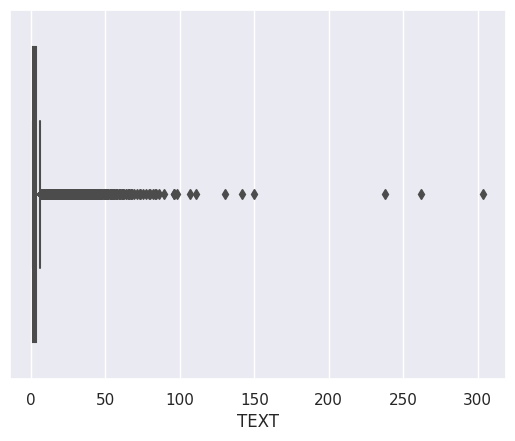

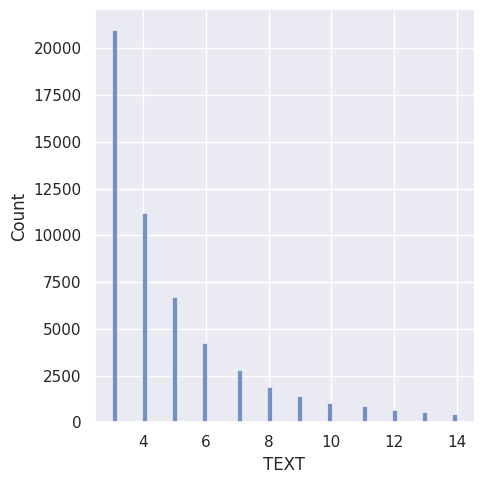

In [56]:
sns.set()

gb_notes = deceased_TSICU.groupby(['CGID','SUBJECT_ID'])
num_notes = gb_notes['TEXT'].count()
print(num_notes)
print(f'number of notes: min={num_notes.min()}, max={num_notes.max()}, mean={num_notes.mean()},  median={num_notes.median()}')
sns.boxplot(x=num_notes)
sns.displot(num_notes[((num_notes>2) & (num_notes<15))])

Seperate deceased and living

In [57]:
deceased_patients = balanced_data[balanced_data['EXPIRE_FLAG'] == 1]
deceased_patients.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392445 entries, 0 to 1238859
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   ROW_ID             392445 non-null  int64  
 1   SUBJECT_ID         392445 non-null  int64  
 2   HADM_ID            392445 non-null  float64
 3   CATEGORY           392445 non-null  object 
 4   DESCRIPTION_x      392445 non-null  object 
 5   CGID               392445 non-null  float64
 6   ISERROR            435 non-null     float64
 7   TEXT               392445 non-null  object 
 8   LABEL              370798 non-null  object 
 9   DESCRIPTION_y      322014 non-null  object 
 10  GENDER             392445 non-null  object 
 11  EXPIRE_FLAG        392445 non-null  int64  
 12  ICD9_CODE          392445 non-null  object 
 13  SEQ_NUM            392445 non-null  int64  
 14  num_of_notes       392445 non-null  int64  
 15  num_of_conditions  392445 non-null  int64  
dtypes

In [58]:
living_patients = balanced_data[balanced_data['EXPIRE_FLAG'] == 0]
living_patients.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 607147 entries, 1042 to 1240437
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   ROW_ID             607147 non-null  int64  
 1   SUBJECT_ID         607147 non-null  int64  
 2   HADM_ID            607147 non-null  float64
 3   CATEGORY           607147 non-null  object 
 4   DESCRIPTION_x      607147 non-null  object 
 5   CGID               607147 non-null  float64
 6   ISERROR            425 non-null     float64
 7   TEXT               607147 non-null  object 
 8   LABEL              597057 non-null  object 
 9   DESCRIPTION_y      368983 non-null  object 
 10  GENDER             607147 non-null  object 
 11  EXPIRE_FLAG        607147 non-null  int64  
 12  ICD9_CODE          607147 non-null  object 
 13  SEQ_NUM            607147 non-null  int64  
 14  num_of_notes       607147 non-null  int64  
 15  num_of_conditions  607147 non-null  int64  
dty

Tokenized words

In [59]:
#text = df_notes_TSICU['TEXT'].str.cat(sep=' ')
#words = nltk.word_tokenize(text)  # very slow

Count words in notes

In [60]:
#stopwords = nltk.corpus.stopwords.words('english')
#words = [word.lower() for word in words if word.lower() not in stopwords and re.match(r'\b\w+\b', word)]  # also slow but only kinda slow
#word_counts = Counter(words)
#most_common_words = word_counts.most_common(300)

In [61]:
#print("Rank\tWord\t\t\tCount")
#for rank, word_count in enumerate(most_common_words, start=1):
  #word, count = word_count
  #print(f"{rank}\t{word.ljust(20)}\t{count}")

Emotional words

In [62]:
#emotional_words = []
#for word_count in most_common_words:
  #word = word_count[0]
  #synsets = wn.synsets(word)
  #if synsets:
    #senti_synset = swn.senti_synset(synsets[0].name())
    #if senti_synset.pos_score() > 0.45 or senti_synset.neg_score() > 0.45:
      #emotional_words.append(word)

#emotional_words

In [63]:
#from textblob import TextBlob
#emotional_words = []
#for word_count in most_common_words:
  #word = word_count[0]
  #tb = TextBlob(word)
  #sentiment = tb.sentiment.polarity
  #if abs(sentiment) > 0.35:
    #emotional_words.append(word)

#emotional_words